In [94]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MultipleLocator, MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report

# Modeling

In this step we'll load the cleaned data set and then perform the modeling steps.

In [95]:
# Load cleaned data from eda step
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)

In [96]:
# Perform Logistic Regression on the data set

# Numerical Predictors
# BMI
# MentHlth
# PhysHlth
# Age

# Categorical Predictors
# HighBP
# HighChol
# CholCheck
# Smoker
# Stroke
# HeartDiseaseorAttack
# PhysActivity
# Fruits
# Veggies
# HvyAlcoholConsump
# AnyHealthcare
# NoDocbcCost
# GenHlth
# DiffWalk
# Sex
# Education
# Income

# Target
# Diabetes_012

# Standardize Data
dependent_column = ["Diabetes_012"]
numerical_predictor_columns = ["BMI", "MentHlth", "PhysHlth", "Age"]

# Find Z-score of Numerical Predictors
Z_train = preprocessing.scale(df[numerical_predictor_columns])
Z_train = pd.DataFrame(Z_train, columns=numerical_predictor_columns)

# Create dummy vars
dummy_HighBP = pd.get_dummies(df["HighBP"], drop_first=True)
dummy_HighChol = pd.get_dummies(df["HighChol"], drop_first=True)
dummy_CholCheck = pd.get_dummies(df["CholCheck"], drop_first=True)
dummy_Smoker = pd.get_dummies(df["Smoker"] , drop_first=True)
dummy_Stroke = pd.get_dummies(df["Stroke"] , drop_first=True)
dummy_HeartDiseaseorAttack = pd.get_dummies(df["HeartDiseaseorAttack"] , drop_first=True)
dummy_PhysActivity = pd.get_dummies(df["PhysActivity"] , drop_first=True)
dummy_Fruits = pd.get_dummies(df["Fruits"] , drop_first=True)
dummy_Veggies = pd.get_dummies(df["Veggies"] , drop_first=True)
dummy_HvyAlcoholConsump = pd.get_dummies(df["HvyAlcoholConsump"] , drop_first=True)
dummy_AnyHealthcare = pd.get_dummies(df["AnyHealthcare"] , drop_first=True)
dummy_NoDocbcCost = pd.get_dummies(df["NoDocbcCost"] , drop_first=True)
dummy_GenHlth = pd.get_dummies(df["GenHlth"] , drop_first=True)
dummy_DiffWalk = pd.get_dummies(df["DiffWalk"] , drop_first=True)
dummy_Sex = pd.get_dummies(df["Sex"] , drop_first=True)
dummy_Education = pd.get_dummies(df["Education"] , drop_first=True)
dummy_Income = pd.get_dummies(df["Income"] , drop_first=True)

# Concatenate the standardized numerical features with the dummy vars
X = pd.concat([Z_train, dummy_HighBP, dummy_HighChol, dummy_CholCheck, dummy_Smoker, dummy_Stroke, dummy_HeartDiseaseorAttack,
                     dummy_PhysActivity, dummy_Fruits, dummy_Veggies, dummy_HvyAlcoholConsump, dummy_AnyHealthcare, dummy_NoDocbcCost,
                    dummy_GenHlth, dummy_DiffWalk, dummy_Sex, dummy_Education, dummy_Income], axis=1)
X.columns = X_train.columns.astype(str)
y = df[dependent_column]

# Do this to avoid warnings
y = y.values.ravel()

# Split data into training and test data after standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1337)

In [97]:
# Logistic Regression with OVR (One-vs-Rest)
ovr_model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, class_weight='balanced')
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
print("\nOvR Classification Report:")
print(classification_report(y_test, y_pred_ovr))

/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



OvR Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     38012
         1.0       0.03      0.17      0.05       926
         2.0       0.34      0.65      0.45      7019

    accuracy                           0.66     45957
   macro avg       0.44      0.50      0.43     45957
weighted avg       0.83      0.66      0.72     45957



In [98]:
# Logistic Regression with Multinomial (One-vs-Reference)
multi_model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)
print("\nMultinomial Classification Report:")
print(classification_report(y_test, y_pred_multi))


Multinomial Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.63      0.76     38012
         1.0       0.03      0.29      0.06       926
         2.0       0.36      0.59      0.44      7019

    accuracy                           0.62     45957
   macro avg       0.44      0.50      0.42     45957
weighted avg       0.83      0.62      0.70     45957



In [99]:
# Logistic Regression with Multinomial (One-vs-Reference) and Cross-Validation
cv_model = LogisticRegressionCV(
    Cs=10,
    cv=10,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=1337
)
cv_model.fit(X_train, y_train)
y_pred_cv = cv_model.predict(X_test)
print("\nCross-Validated Logistic Regression (Multinomial) Report:")
print(classification_report(y_test, y_pred_cv))


Cross-Validated Logistic Regression (Multinomial) Report:
              precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     38012
         1.0       0.03      0.24      0.05       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.64     45957
   macro avg       0.44      0.50      0.42     45957
weighted avg       0.83      0.64      0.71     45957



In [100]:
def lasso_plot(Cs, coef_path, labels, ax=None):
    if len(coef_path) != len(labels):
        coef_path = coef_path.T
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.set_xlabel('1 / lambda')
        ax.set_ylabel('weights')
    for coef, label in zip(coef_path, labels):
        ax.semilogx(Cs, coef, label=label)
    ax.legend()
    return ax

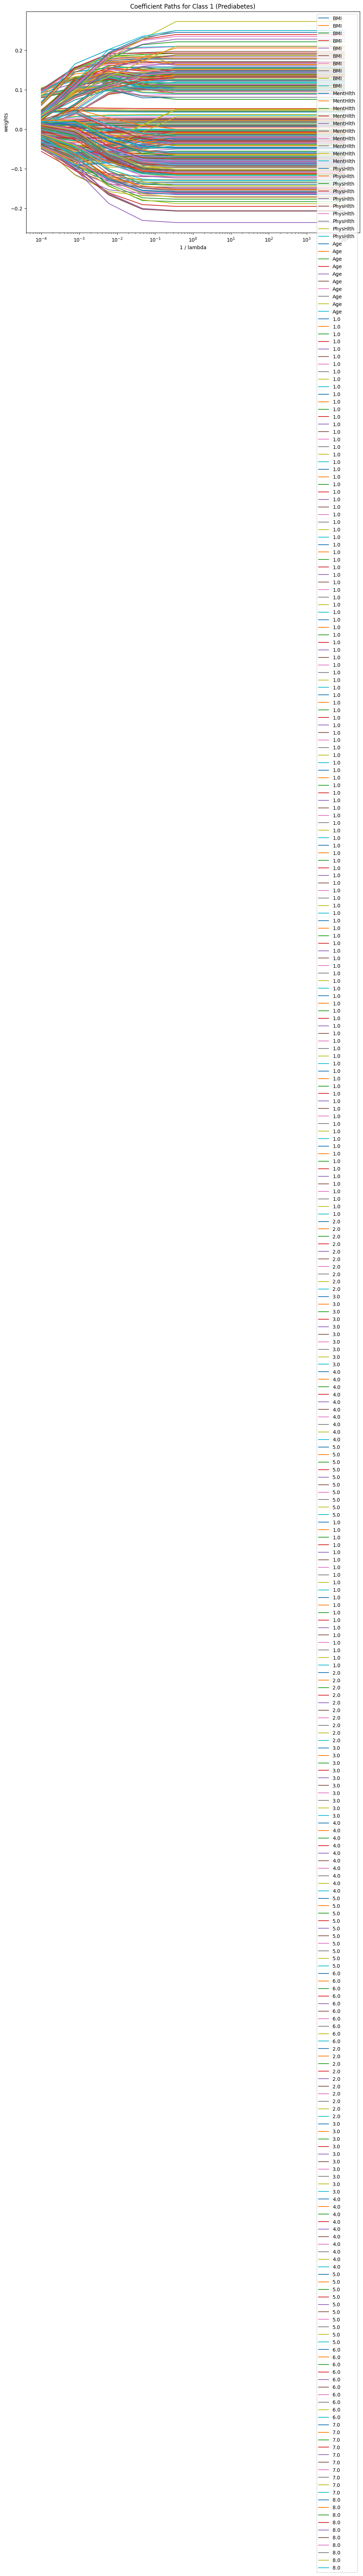

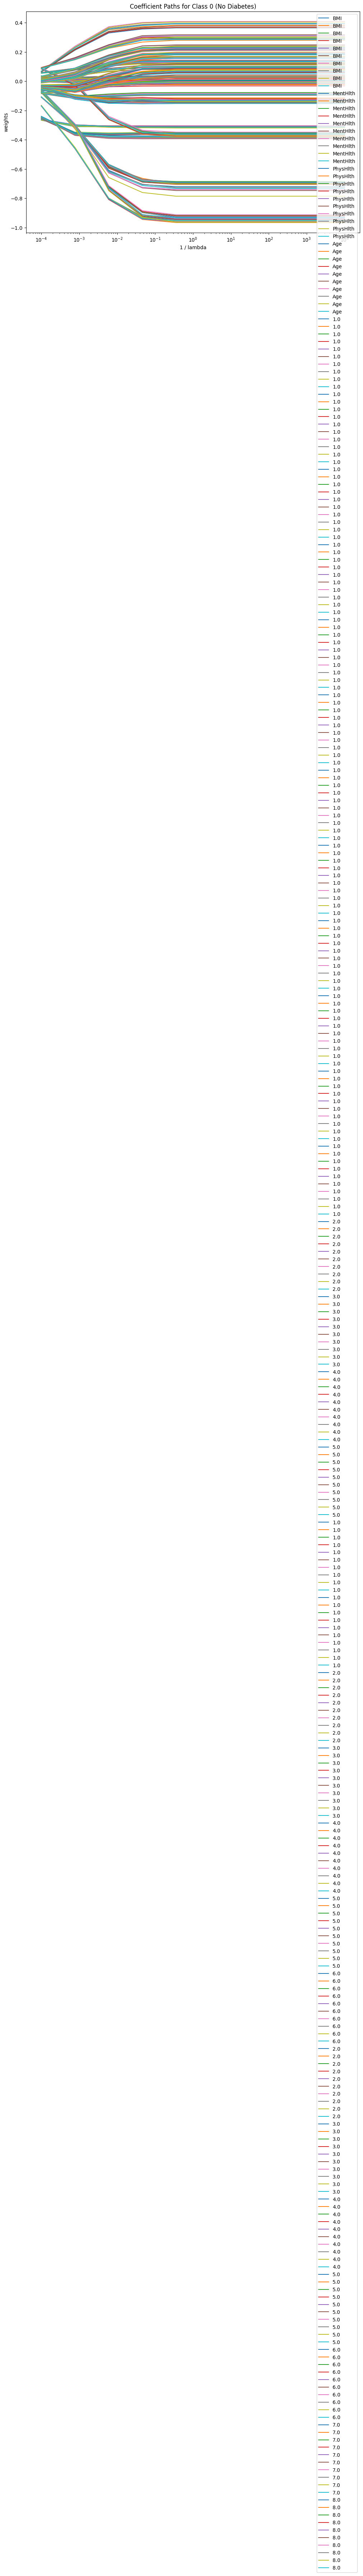

Text(0.5, 1.0, 'Coefficient Paths for Class 2 (Diabetes)')

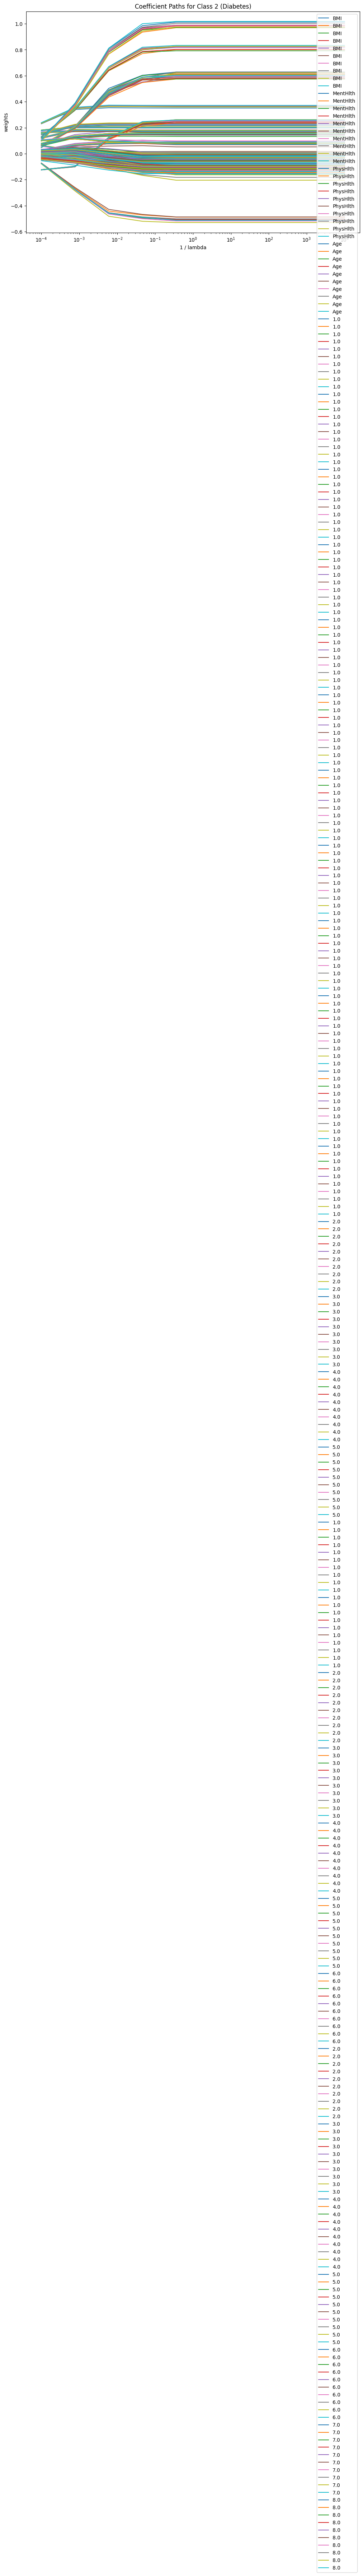

In [101]:
Cs_used = cv_model.Cs_
coef_path = cv_model.coefs_paths_[1]
feature_labels = X.columns.tolist()

# Plot for class 1 (Prediabetes)
lasso_plot(Cs_used, coef_path, feature_labels)
plt.title("Coefficient Paths for Class 1 (Prediabetes)")
plt.show()

# Plot for class 0 (No Diabetes)
coef_path_0 = cv_model.coefs_paths_[0]
lasso_plot(Cs_used, coef_path_0, feature_labels)
plt.title("Coefficient Paths for Class 0 (No Diabetes)")
plt.show()

# Plot for class 2 (Diabetes)
coef_path_2 = cv_model.coefs_paths_[2]
lasso_plot(Cs_used, coef_path_2, feature_labels)
plt.title("Coefficient Paths for Class 2 (Diabetes)")